In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from fastai import *
from fastai.vision import *

import os
print(os.listdir("./pizzadataset"))

['.DS_Store', 'test', 'models', 'train']


In [3]:
path = Path('./pizzadataset')
path

PosixPath('pizzadataset')

In [5]:
data = ImageDataBunch.from_folder(path, train = ".", valid_pct=0.2, ds_tfms=get_transforms(), size=299, bs=32, num_workers=0).normalize(imagenet_stats)

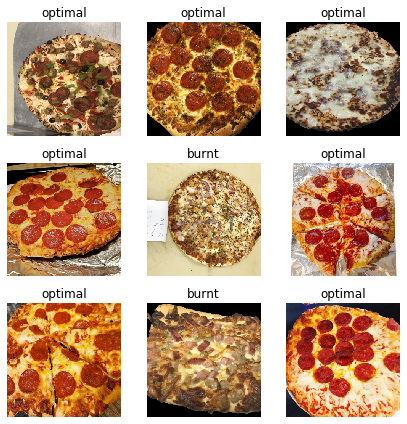

In [6]:
data.show_batch(rows=3, figsize=(6,6))

In [7]:
data.classes

['burnt', 'optimal']

In [8]:
learn = create_cnn(data, models.resnet34, metrics = [error_rate, accuracy])

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.088349,1.028895,0.535714,0.464286,02:18
1,0.969345,0.905115,0.321429,0.678571,02:14
2,0.809509,0.972698,0.285714,0.714286,02:31
3,0.684280,1.019645,0.285714,0.714286,02:18


In [10]:
learn.save("stage-doneness")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


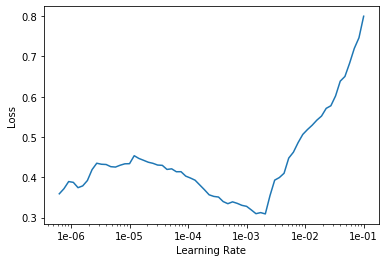

In [11]:
#Initiating refit and checking LR
learn.load("stage-doneness")
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [13]:
#The lowest loss is at 1e-04 and loss increases from after 1e-03. Refitting by modulating LR
learn.fit_one_cycle(2,max_lr=slice(1e-05,1e-03))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.306220,1.321184,0.321429,0.678571,02:15
1,0.391471,1.304668,0.321429,0.678571,02:15


In [14]:
#Since the accuracy didn't improve, exporting the first run
learn.export("stage_doneness.pkl")

In [15]:
#Uploaded a separate dataset for testing each of the above classes.
PRED_PATH = "./testimages"
img_91 = open_image(f'{PRED_PATH}/91.jpg')
img_92 = open_image(f'{PRED_PATH}/92.jpg')
img_117 = open_image(f'{PRED_PATH}/117.jpg')
img_118 = open_image(f'{PRED_PATH}/118.jpg')

In [16]:
learn.load('stage-doneness')
pred_class = learn.predict(img_92)
pred_class

(Category tensor(0), tensor(0), tensor([0.9763, 0.0237]))

In [17]:
learn.load('stage-doneness')
pred_class = learn.predict(img_117)
pred_class

(Category tensor(1), tensor(1), tensor([2.8079e-04, 9.9972e-01]))